In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import astropy.constants as const

from astropy.timeseries import LombScargle

def amplitude_spectrum(t, y, fmin=None, fmax=None, oversample_factor=10.0):
    
    tmax = t.max()
    tmin = t.min()
    df = 1.0 / (tmax - tmin)

    if fmin is None:
        fmin = df
    if fmax is None:
        fmax = 0.5 / np.median(np.diff(t))  # *nyq_mult

    freq = np.arange(fmin, fmax, df / oversample_factor)
    model = LombScargle(t, y)
    sc = model.power(freq, method="fast", normalization="psd")

    fct = np.sqrt(4.0 / len(t))
    amp = np.sqrt(sc) * fct

    return freq, amp


In [2]:
df = pd.read_csv('../../dsct exoplanet/data/catalogues/rev_AF_stars.csv', dtype={'kic': str})
df = df[df['dSct'] == 1]
# df['pulsating'] == 1

In [3]:
plt.style.use('science')

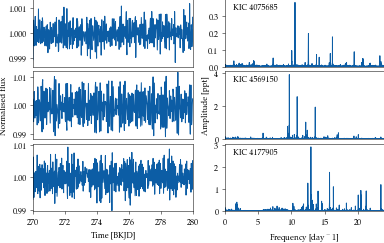

In [5]:
import glob
fig, axes = plt.subplots(3,2, figsize=[6.3, 3.9])
axes = axes.flatten()

ax = axes[0]
row = df.iloc[202]
time, flux, _= np.loadtxt(glob.glob(f'../../dsct exoplanet/data/lightcurves/spline corrected PDC/lc/*5202905*')[0]).T
ax.plot(time, flux, rasterized=True)
ax.set(xlim=[270,280], ylim=[1 - 3*np.std(flux), 1 + 3*np.std(flux)], xticks=[])
f,a = amplitude_spectrum(time, flux)
axes[1].plot(f, a*1e3, rasterized=True)
axes[1].set(xlim=[0, 24], ylim=[0, None], xticks=[])
axes[1].annotate(f'KIC {row.kic}', (0.05, 0.85), xycoords='axes fraction', fontsize=8)

ax = axes[2]
row = df.iloc[281]
time, flux, _= np.loadtxt(glob.glob(f'../../dsct exoplanet/data/lightcurves/spline corrected PDC/lc/*{row.kic}*')[0]).T
ax.plot(time, flux, rasterized=True)
ax.set(xlim=[270,280], ylim=[1 - 3*np.std(flux), 1 + 3*np.std(flux)], xticks=[], ylabel='Normalised flux')
f,a = amplitude_spectrum(time, flux)
axes[3].plot(f, a*1e3, rasterized=True)
axes[3].set(xlim=[0, 24], ylim=[0, None], xticks=[], ylabel='Amplitude [ppt]')
axes[3].annotate(f'KIC {row.kic}', (0.05, 0.85), xycoords='axes fraction', fontsize=8)

ax = axes[4]
row = df.iloc[222]
time, flux, _= np.loadtxt(glob.glob(f'../../dsct exoplanet/data/lightcurves/spline corrected PDC/lc/*{row.kic}*')[0]).T
ax.plot(time, flux, rasterized=True)
ax.set(xlim=[270,280], ylim=[1 - 3*np.std(flux), 1 + 3*np.std(flux)], xlabel='Time [BKJD]')
f,a = amplitude_spectrum(time, flux)
axes[5].plot(f, a*1e3, rasterized=True)
axes[5].set(xlim=[0, 24], ylim=[0, None], xlabel=f'Frequency [day$^{-1}$]')
axes[5].annotate(f'KIC {row.kic}', (0.05, 0.85), xycoords='axes fraction', fontsize=8)

plt.subplots_adjust(hspace=0.07)

plt.savefig('example_dsct.pdf', dpi=300, bbox_inches='tight', pad_inches=0)